# Dask DataFrame

Материалы:
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* JESSE C. DANIEL. Data Science with Python and Dask.

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [ ]:
import pandas as pd
import numpy as np
import operator
import os
import dask
import dask.dataframe as dd

In [ ]:
df = dd.read_csv('accounts/*.csv', dtype={'amount': 'float64'})

In [ ]:
df.compute()

,id,names,amount
0,39,Victor,205.0
1,289,Hannah,87.0
2,234,Victor,1820.0
3,155,Ray,-600.0
4,266,Ray,572.0
...,...,...,...
999995,270,Edith,810.0
999996,249,Norbert,132.0
999997,308,Kevin,20.0
999998,302,Tim,33.0


2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

In [ ]:
name_count = df['names'].value_counts().compute()
name_count

Norbert     188147
Alice       185892
George      183249
Tim         162432
Bob         157065
Michael     148372
Ingrid      132067
Oliver      121907
Quinn       118071
Wendy       110657
Charlie     109236
Ursula      108745
Hannah      108632
Ray         108610
Sarah       104781
Victor      102656
Frank        99984
Laura        97216
Jerry        96378
Xavier       94445
Edith        89991
Zelda        89047
Kevin        84784
Dan          73293
Patricia     62881
Yvonne       61462
Name: names, dtype: int64

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

In [ ]:
def divide_by_100(x):
    if x > 100:
        return x // 100
    else:
        return 0

#meta самостоятельно указывает тип данных для новой колонки
df['new_col'] = df['amount'].apply(divide_by_100, meta=('amount', 'int64'))
df.compute()

,id,names,amount,new_col
0,39,Victor,205.0,2.0
1,289,Hannah,87.0,0.0
2,234,Victor,1820.0,18.0
3,155,Ray,-600.0,0.0
4,266,Ray,572.0,5.0
...,...,...,...,...
999995,270,Edith,810.0,8.0
999996,249,Norbert,132.0,1.0
999997,308,Kevin,20.0,0.0
999998,302,Tim,33.0,0.0


## Лабораторная работа 13

In [ ]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [ ]:
recipes = dd.read_csv('recipes_full/*.csv', parse_dates=['submitted'], dtype={'minutes': 'float64', 'n_steps': 'float64'})
recipes.compute()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10
...,...,...,...,...,...,...,...,...
278949,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
278950,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
278951,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
278952,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9


2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [ ]:
print("Количество npartitions: ", recipes.npartitions)
recipes.dtypes

Количество npartitions:  8


id                         int64
name                      object
minutes                  float64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients              int64
dtype: object

3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [ ]:
recipes.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


In [ ]:
recipes.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
278950,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
278951,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
278952,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
278953,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


4. Посчитайте, сколько строк содержит каждый из блоков

map_partitions позволяет применить функцию к каждой партиции Dask DataFrame отдельно. Таким образом, можно выполнять операции на каждом блоке данных параллельно. Функция len принимает объект и возвращает количество элементов в этом объекте.

In [ ]:
nrows = recipes.map_partitions(len).compute()

print(nrows)

0    278955
1    278955
2    278955
3    278955
4    278955
5    278954
6    278954
7    278954
dtype: int64


5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` в этом случае.

In [ ]:
max_n_steps = recipes['n_steps'].max().compute()
print(max_n_steps)

145.0


Граф вычислений будет состоять из нескольких блоков, представляющих партиции Dask DataFrame, каждый из которых будет вычислять свой максимум. Затем результаты будут объединены в единый результат.

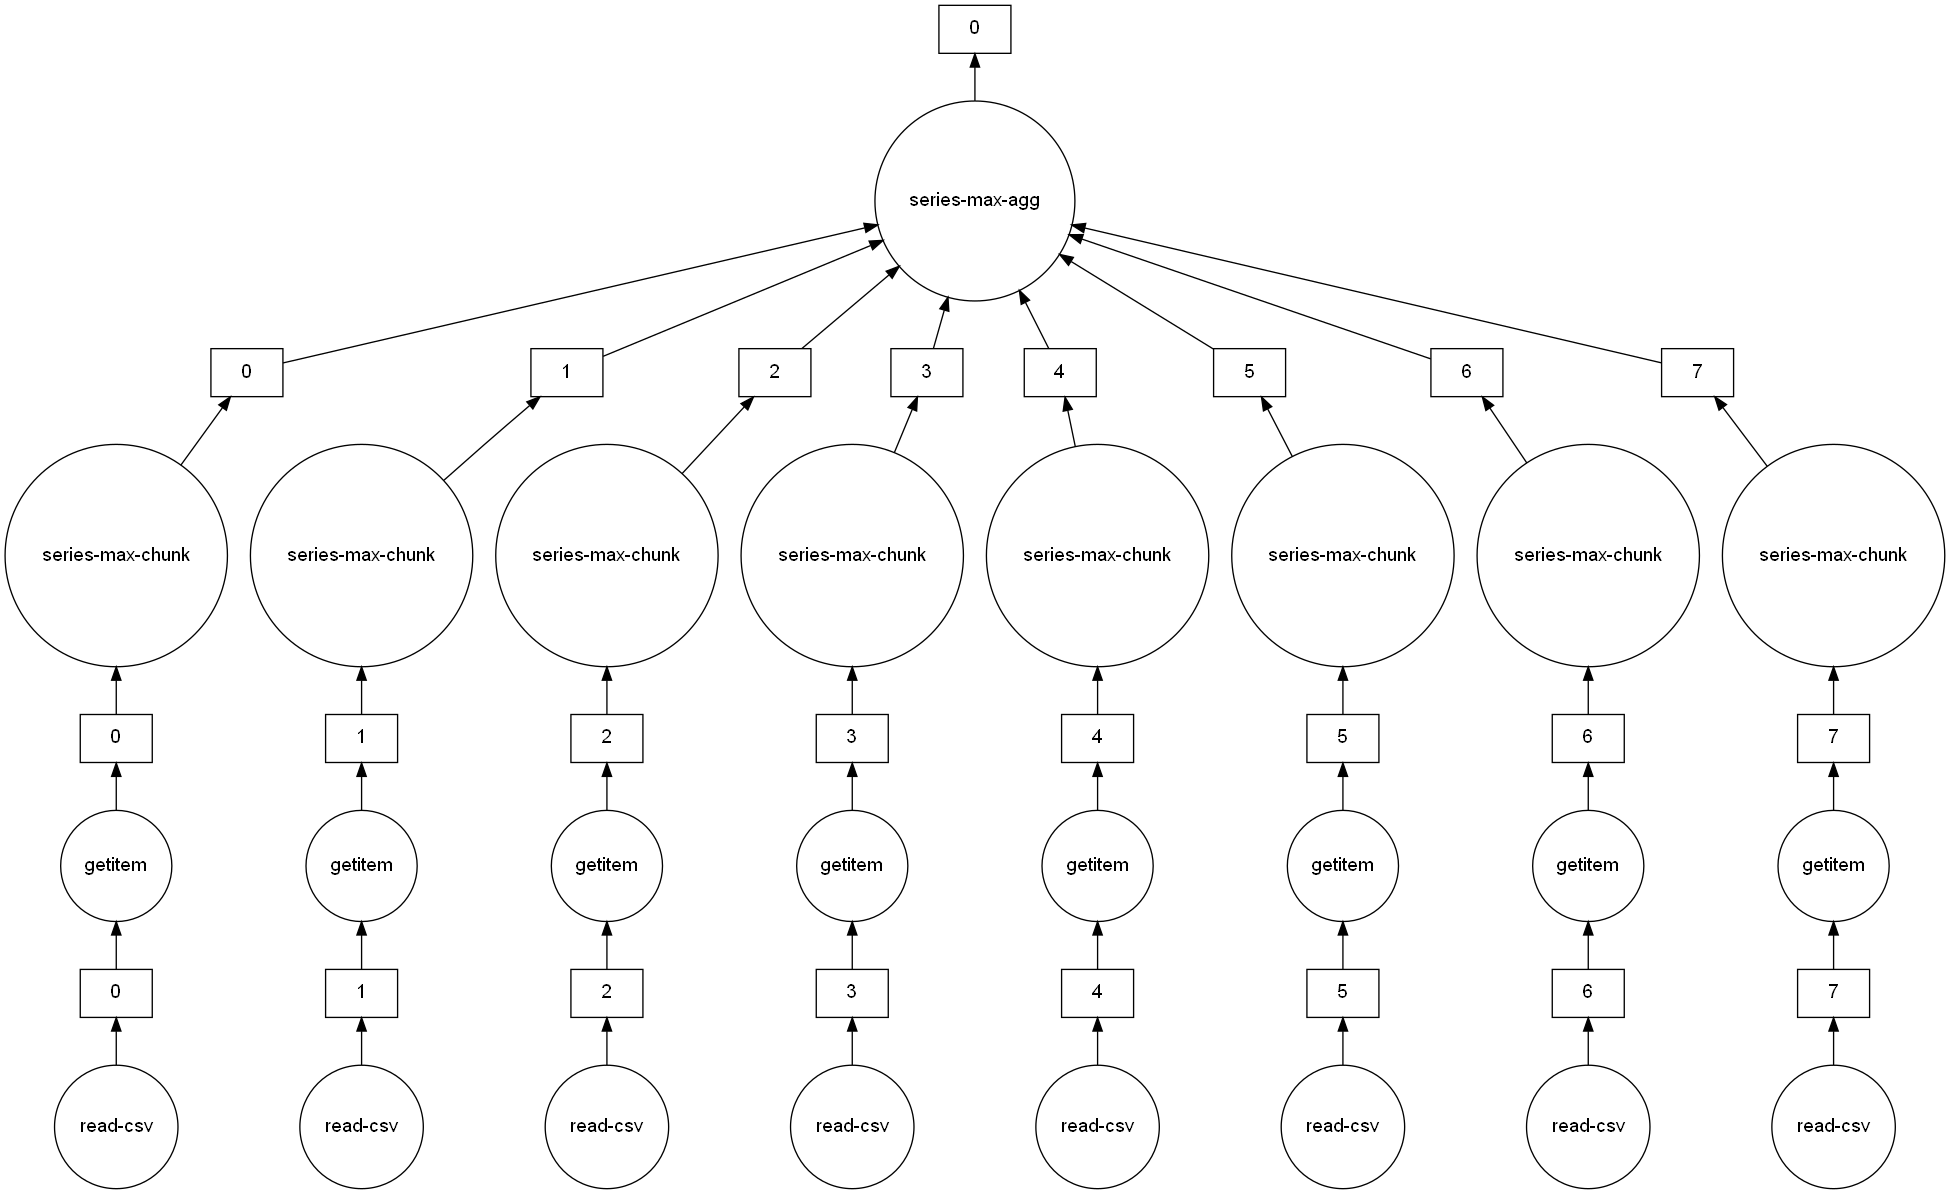

In [ ]:
recipes['n_steps'].max().visualize()

6. Посчитайте количество отзывов с группировкой по месяцам добавления отзыва в базу.

In [ ]:
#создаем столбец, на основе которого будем группировать, strftime для форматирования значений даты в строку в формате YYYY-MM
recipes['month'] = recipes['submitted'].dt.strftime('%Y-%m')
# Группируем по месяцам и считаем количество отзывов
count_by_month = recipes.groupby('month')['id'].count().compute()

In [ ]:
count_by_month

month
1970-01    3306
1970-02    2943
1970-03    3324
1970-04    3245
1970-05    3284
           ... 
2021-04    3139
2021-05    3223
2021-06    3128
2021-07    3342
2021-08    1195
Name: id, Length: 620, dtype: int64

In [ ]:
#создаем столбец, на основе которого будем группировать, strftime для форматирования значений даты в строку в формате MM
recipes['month'] = recipes['submitted'].dt.strftime('%m')
# Группируем по месяцам и считаем количество отзывов
count_by_month = recipes.groupby('month')['id'].count().compute()

In [ ]:
count_by_month

month
01    193363
02    173834
03    192389
04    186049
05    192487
06    184205
07    189337
08    187276
09    181081
10    187018
11    180974
12    183624
Name: id, dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [ ]:
import json
import glob
import re

def parse_review_json_with_rating(json_string, include_path):
    json_obj = json.loads(json_string)
    match = re.search(r'reviews_(\d+)\.json', include_path)
    if match:
        rating = int(match.group(1))
        json_obj['rating'] = rating
    return json_obj


In [ ]:
# Читаем все файлы в список
files = glob.glob('reviews_full/reviews_*.json')
print(files)
# Создаем первый dask.bag
b_ratings = db.read_text(files[0]).map(parse_review_json_with_rating, include_path=files[0])

#Объединяем остальные dask.bag
for file in files[1:]:
    cur = db.read_text(file).map(parse_review_json_with_rating, include_path=file)
    b_ratings = db.concat([b_ratings, cur])

['reviews_full\\reviews_0.json', 'reviews_full\\reviews_1.json', 'reviews_full\\reviews_2.json', 'reviews_full\\reviews_3.json', 'reviews_full\\reviews_4.json', 'reviews_full\\reviews_5.json']


In [ ]:
b_ratings.take(3)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.',
  'rating': 0},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten',
  'rating': 0},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will

In [ ]:
def average_by_month(dask_bag):
    mas_rating = []
    for i in range(1, 13):
        mean_rating = dask_bag.filter(lambda rec: int(rec['date'][5:7]) == i).pluck('rating').mean().compute()
        mas_rating.append(mean_rating)
    return mas_rating

In [ ]:
rating_by_month = average_by_month(b_ratings)

In [ ]:
for num, rating in enumerate(rating_by_month):
    print(num + 1, ":", rating)

1 : 4.408552653653274
2 : 4.4071352170488645
3 : 4.406910862714342
4 : 4.4122590698057165
5 : 4.41540140444107
6 : 4.418419464177926
7 : 4.411716955901544
8 : 4.410821624883572
9 : 4.410660721980786
10 : 4.4114520536121296
11 : 4.4088292754368075
12 : 4.4069079012853605


8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [ ]:
dataframe = pd.DataFrame({"mean_rating": rating_by_month, "recipes_count": list(count_by_month), })
dataframe.index += 1

In [ ]:
dataframe

,mean_rating,recipes_count
1,4.408553,193363
2,4.407135,173834
3,4.406911,192389
4,4.412259,186049
5,4.415401,192487
6,4.418419,184205
7,4.411717,189337
8,4.410822,187276
9,4.410661,181081
10,4.411452,187018
